./input/set_a/extrahls__201102070251.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201102071835.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201102241217.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201103150114.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201103170134.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201103182227.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201103200218.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201104021355.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201104140118.wav
Sample width:  2
Frame rate:  44100
./input/set_a/extrahls__201104270458.wav
Sample width:  2
Frame rate:  44100


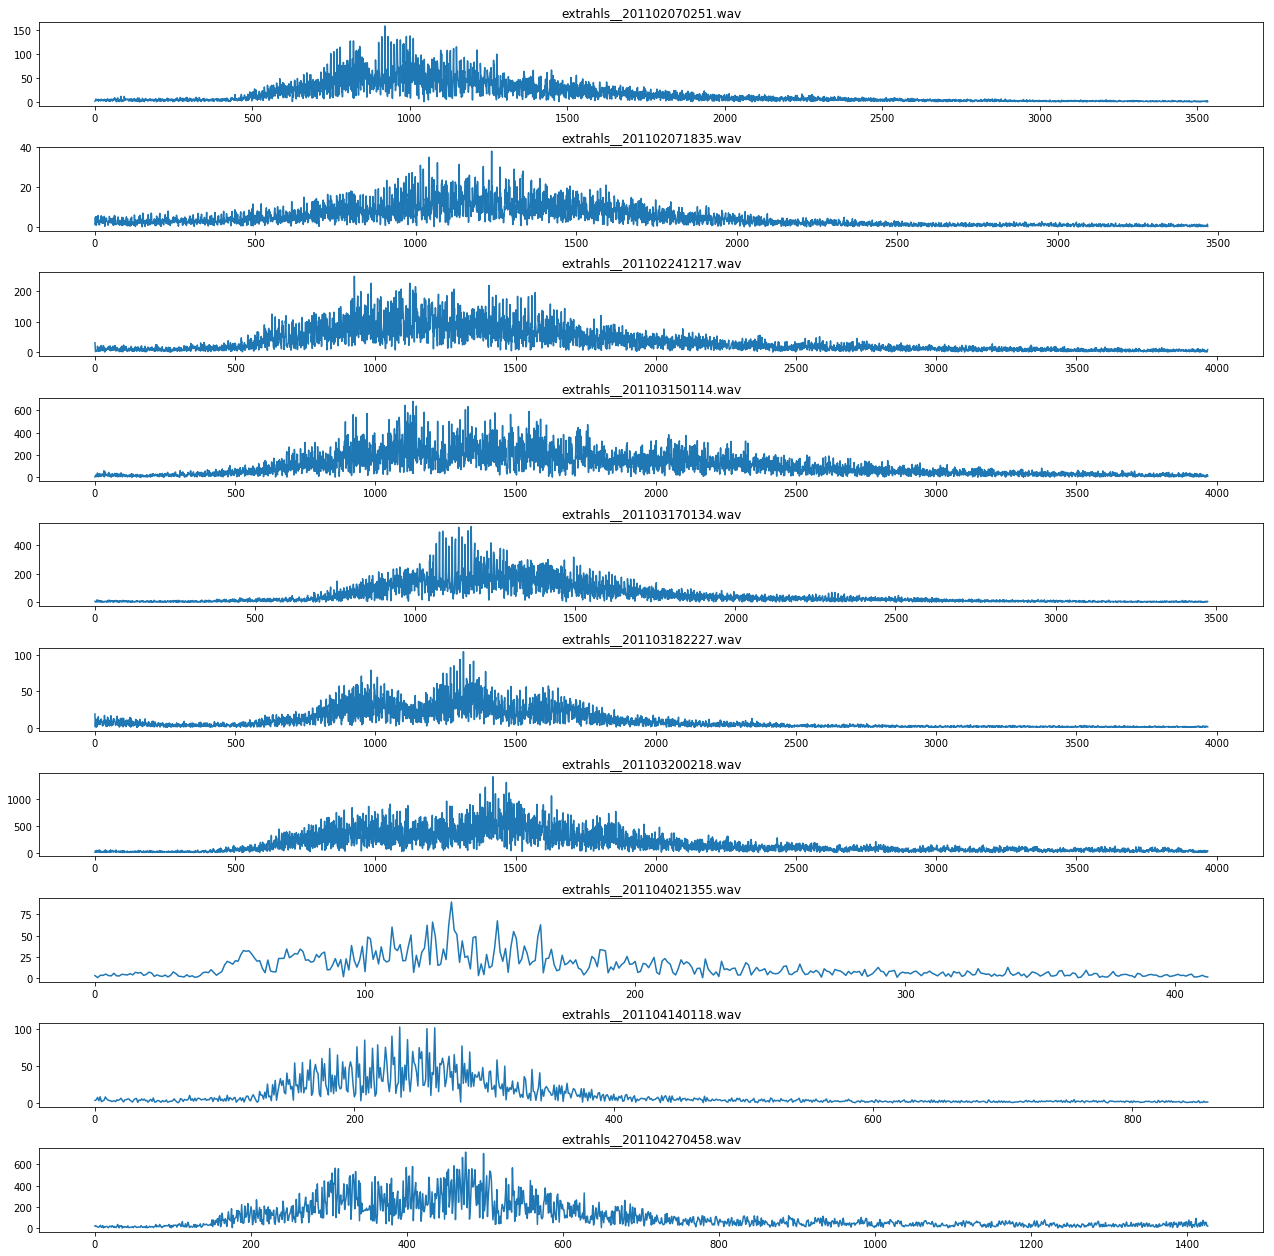

In [40]:
import os
import wave
import struct
from matplotlib import pyplot as plt
import scipy.fftpack
import numpy as np
%matplotlib inline

DIR_A = './input/set_a/'

def get_xy_normal(filename):
    f = wave.open(filename)
    
    print(filename)

    # read frames
    frames = f.readframes(-1)

    # checking the sample width
    print('Sample width: ', f.getsampwidth())

    # samples - unpack byte
    samples = struct.unpack('h' * f.getnframes(), frames)

    # frame rates
    framerate = f.getframerate()
    print('Frame rate: ', framerate)

    # timing information??
    t = [float(i)/framerate for i in range(len(samples))]

    # plotting
#     plt.plot(t, samples)
    
    return t, samples

def get_xy_fft(filename):
    x, y = get_xy_normal(filename)
    # number of sample points
    N = len(x)
    
    # interval
    T = x[1] - x[0]

    # fft
    yf = scipy.fftpack.fft([v / (2.0**15) for v in y])
    
    xf = np.arange(N / 100)
    
    return xf, np.abs(yf[0:len(xf)])
    

    
if __name__ == '__main__':
#     graph_normal(NORMAL_FILE)

    total = 10 #len(os.listdir(DIR_A))
    start = 100
    end = start + total 
    fig = plt.figure(figsize=(20, total * 2)) # 20 inches width, 2 inches height per graph
    
    for num, filename in enumerate(os.listdir(DIR_A)[start:end]):
#         x, y = get_xy_normal(os.path.join(DIR_A, filename))
        x, y = get_xy_fft(os.path.join(DIR_A, filename))
        plt.subplot(total, 1, num + 1)
        plt.plot(x, y)
        plt.title(filename)
        
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)    
    plt.show()
    
    
    
    
    
    